In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df=pd.read_csv("supply_chain_data.csv")

In [4]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


**Data Preprocessing**

In [5]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [13]:
df.drop("Lead time", axis=1, inplace=True)

In [14]:
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Supplier name,Location,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Supplier 3,Mumbai,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Supplier 3,Mumbai,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Supplier 1,Mumbai,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Supplier 5,Kolkata,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Supplier 1,Delhi,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Supplier 4,Mumbai,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Supplier 3,Mumbai,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Supplier 4,Mumbai,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Supplier 5,Chennai,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


**Total stock level**

In [18]:
print(sum(df["Stock levels"]))

4777


**Total Lead Times**

In [19]:
print(sum(df["Lead times"]))

1596


**Total revenue generated**

In [21]:
print(sum(df["Revenue generated"]))

577604.8187380087


**Revenue Generated by each product**

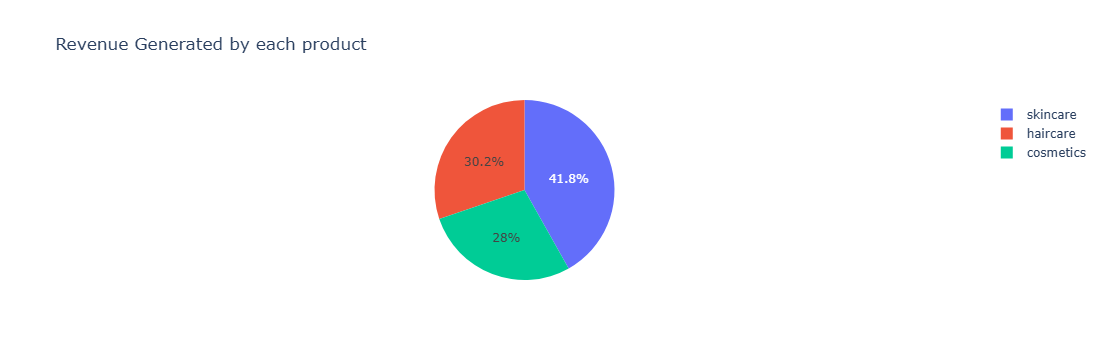

In [117]:
revenue_group=df.groupby("Product type")["Revenue generated"].sum().reset_index()
revenue=px.pie(revenue_group,values="Revenue generated",names="Product type",title='Revenue Generated by each product')
revenue.show()

**Revenue Generated by different locations**

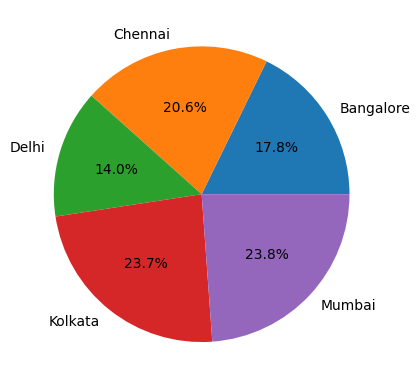

In [29]:
revenue=df.groupby("Location")["Revenue generated"].sum()
plt.pie(revenue,labels=revenue.index,autopct='%1.1f%%')
plt.show()

**Sales by Product Type**

  Product type  Number of products sold
0    cosmetics                    11757
1     haircare                    13611
2     skincare                    20731


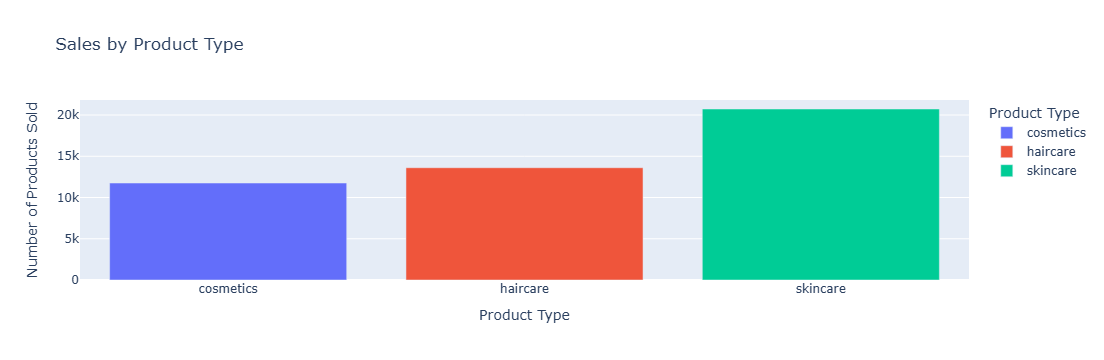

In [46]:
sales = df.groupby("Product type")["Number of products sold"].sum().reset_index()
fig = px.bar(sales, x="Product type", y="Number of products sold", 
             title="Sales by Product Type", 
             labels={"Product type": "Product Type", "Number of products sold": "Number of Products Sold"},
             hover_data={"Number of products sold": True}, 
             color="Product type")
fig.show()

**Order Quantity by SKU**

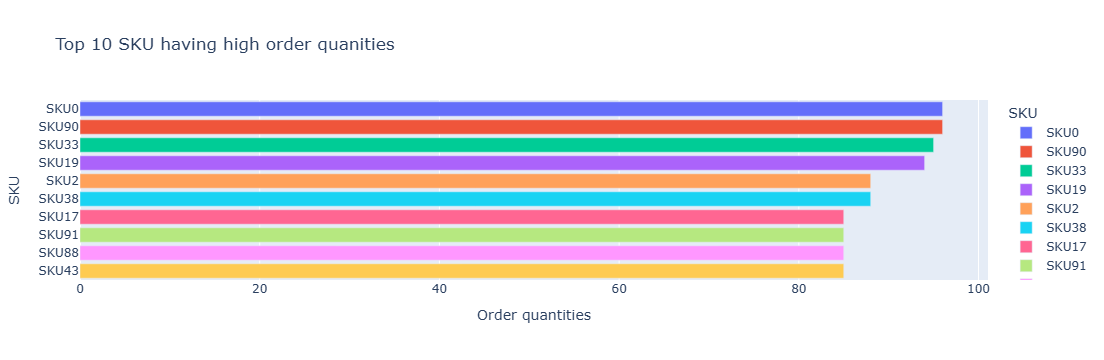

In [64]:
order_quantity=df.sort_values(by="Order quantities",ascending=False).head(10)
order_quantity_fig=px.bar(order_quantity, x="Order quantities", y="SKU", orientation='h',title="Top 10 SKU having high order quanities",color="SKU")
order_quantity_fig.show()

**Revenue generated by shipping carrier**

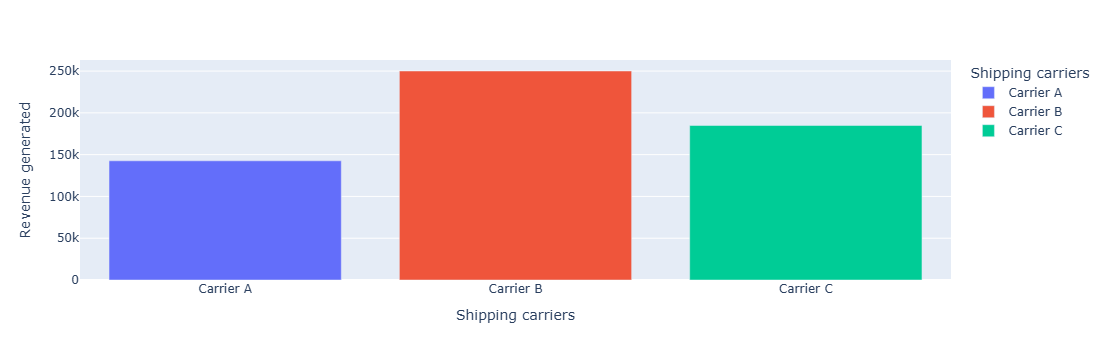

In [74]:
shipping_revenue=df.groupby("Shipping carriers")["Revenue generated"].sum().reset_index()
shipping_revenue_=px.bar(shipping_revenue,x="Shipping carriers",y="Revenue generated",color="Shipping carriers")
shipping_revenue_.show()

**Shipping Costs by Carrier**

In [67]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Production volumes', 'Manufacturing lead time', 'Manufacturing costs',
       'Inspection results', 'Defect rates', 'Transportation modes', 'Routes',
       'Costs'],
      dtype='object')

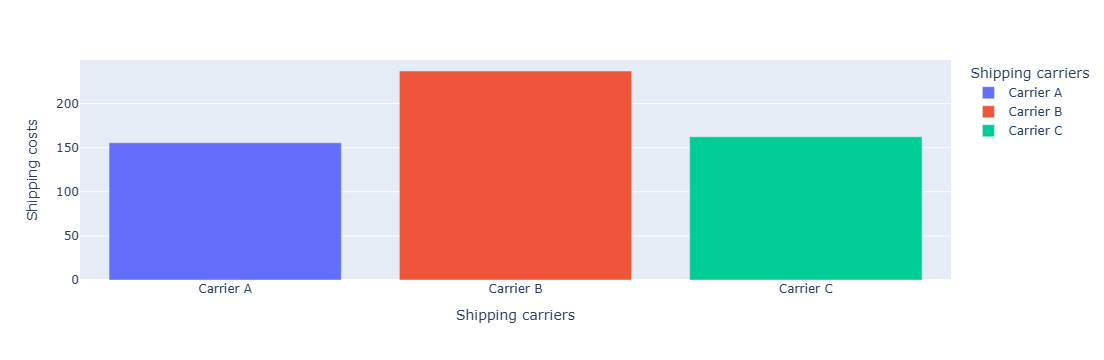

In [76]:
shipping_cost=df.groupby("Shipping carriers")["Shipping costs"].sum().reset_index()
shipping_cost_=px.bar(shipping_cost,x="Shipping carriers",y="Shipping costs",color="Shipping carriers")
shipping_cost_.show()

**Cost Distribution by Transportation Mode**

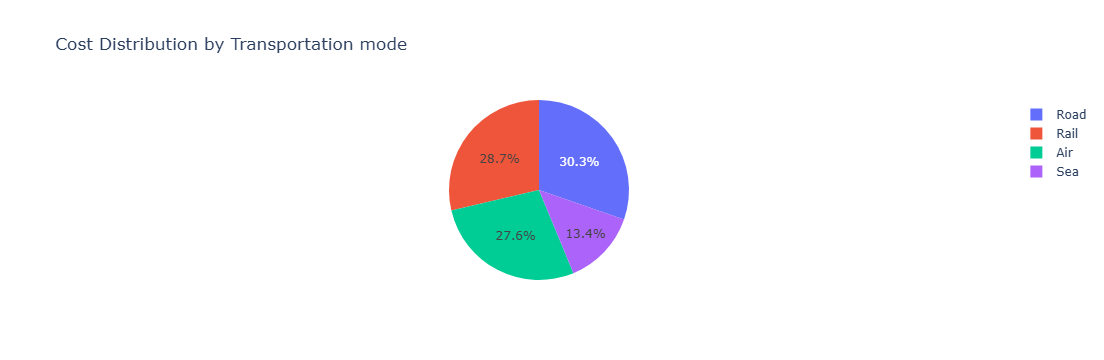

In [82]:
transport=df.groupby("Transportation modes")["Costs"].sum().reset_index()
transport_mode=px.pie(transport,values="Costs",names="Transportation modes",title='Cost Distribution by Transportation mode')
transport_mode.show()

**Average Defect Rates by Product Type**

In [84]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Production volumes', 'Manufacturing lead time', 'Manufacturing costs',
       'Inspection results', 'Defect rates', 'Transportation modes', 'Routes',
       'Costs'],
      dtype='object')

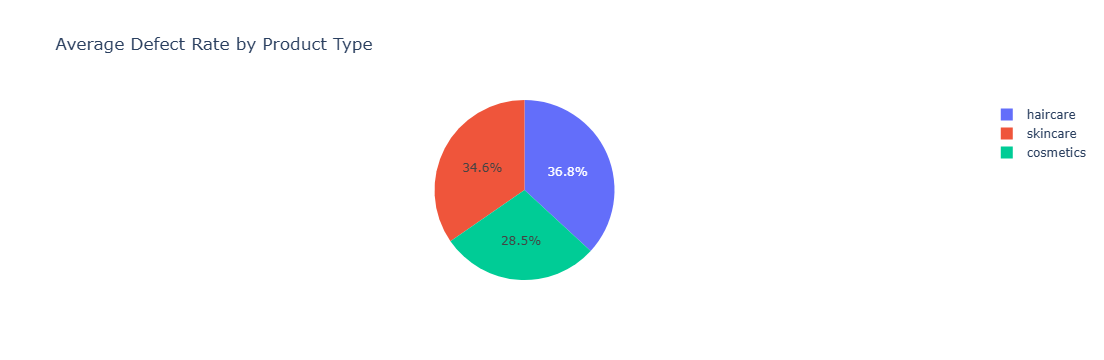

In [88]:
defect=df.groupby("Product type")["Defect rates"].mean().reset_index()
defect["Defect rates"] = defect["Defect rates"].round(2)
defect_rate=px.pie(defect,values="Defect rates",names="Product type",title='Average Defect Rate by Product Type')
defect_rate.show()

**Defect Rates by Transportation Mode**

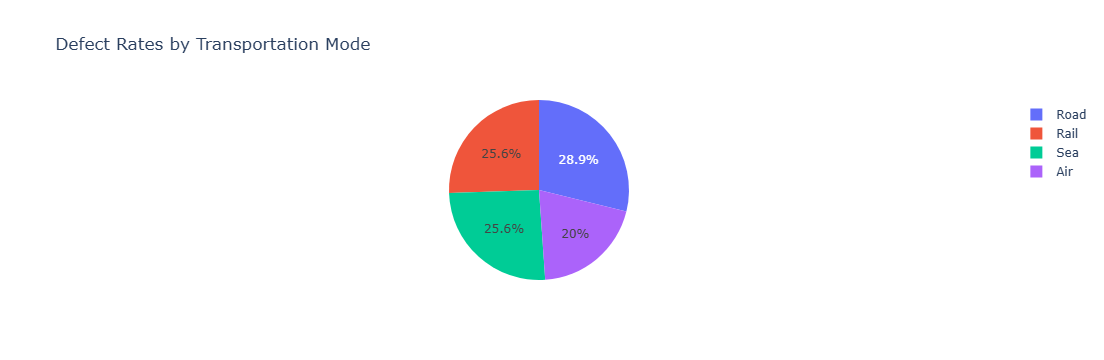

In [89]:
defect=df.groupby("Transportation modes")["Defect rates"].mean().reset_index()
defect["Defect rates"] = defect["Defect rates"].round(2)
defect_rate=px.pie(defect,values="Defect rates",names="Transportation modes",title='Defect Rates by Transportation Mode')
defect_rate.show()

**Profit by Product type**

In [90]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Production volumes', 'Manufacturing lead time', 'Manufacturing costs',
       'Inspection results', 'Defect rates', 'Transportation modes', 'Routes',
       'Costs'],
      dtype='object')

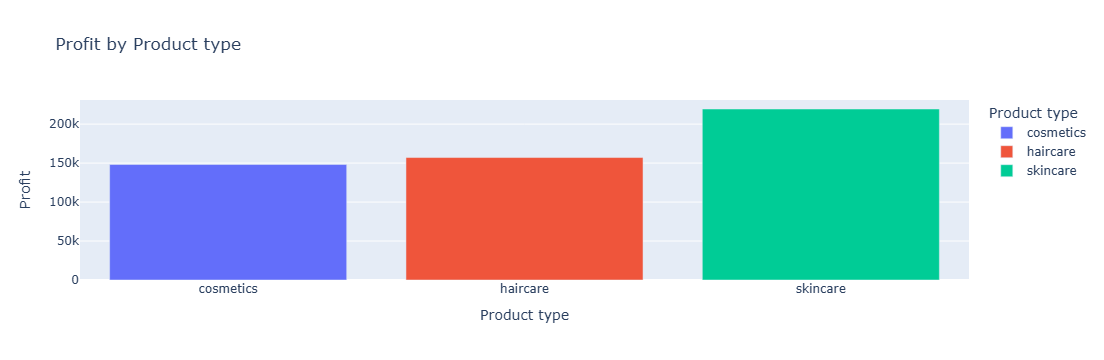

In [92]:
df["Profit"] = df["Revenue generated"] - df["Costs"]
profit_group=df.groupby("Product type")["Profit"].sum().reset_index()
profit=px.bar(profit_group,x="Product type",y="Profit",title="Profit by Product type",color="Product type")
profit.show()

In [93]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Production volumes', 'Manufacturing lead time', 'Manufacturing costs',
       'Inspection results', 'Defect rates', 'Transportation modes', 'Routes',
       'Costs', 'Profit'],
      dtype='object')

**Relationship between manufacturing cost and revenue generated**

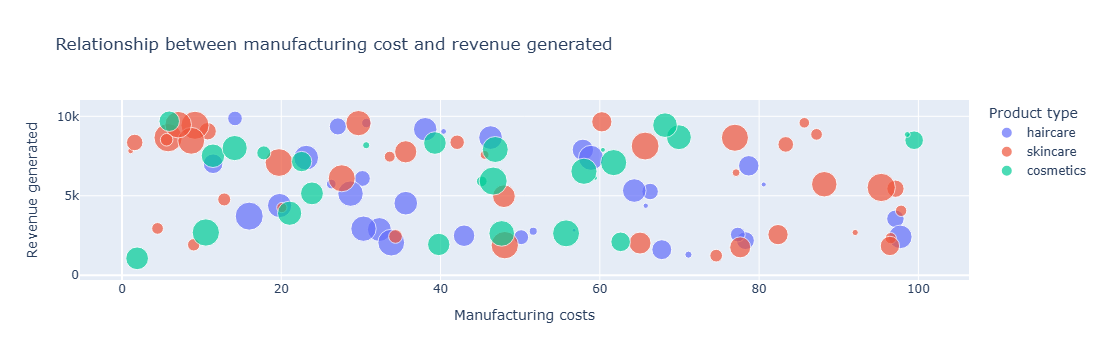

In [99]:
df['Price']=df['Price'].round(2)
manufact_rev=px.scatter(df,x="Manufacturing costs",y="Revenue generated",title="Relationship between manufacturing cost and revenue generated",
                       size="Price",color="Product type",hover_data={'SKU'})
manufact_rev.show()

**Comparison of maufacturing cost and Price**

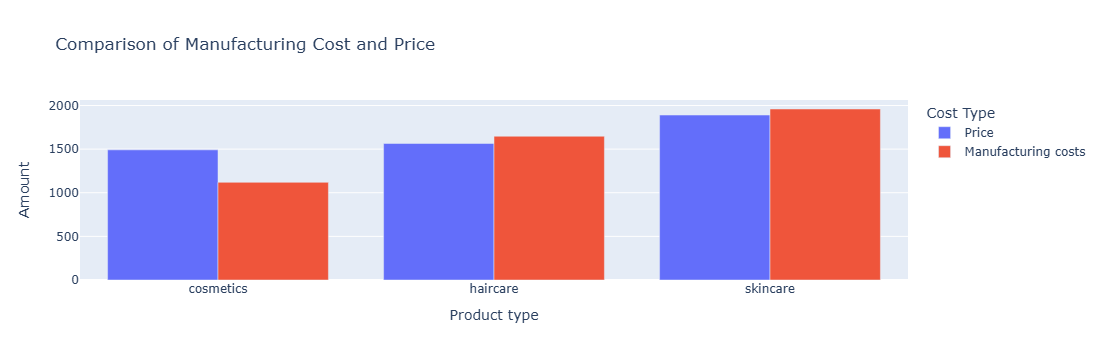

In [107]:
price_group = df.groupby("Product type")["Price"].sum().reset_index()
manufact_group = df.groupby("Product type")["Manufacturing costs"].sum().reset_index()
comparison_df = pd.merge(price_group, manufact_group, on="Product type")
comparison_df = comparison_df.melt(id_vars="Product type", var_name="Cost Type", value_name="Amount")
fig = px.bar(comparison_df, x="Product type", y="Amount", color="Cost Type", 
             title="Comparison of Manufacturing Cost and Price", 
             barmode="group")
fig.show()


In [108]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Production volumes', 'Manufacturing lead time', 'Manufacturing costs',
       'Inspection results', 'Defect rates', 'Transportation modes', 'Routes',
       'Costs', 'Profit'],
      dtype='object')

**Average Lead time by product type**

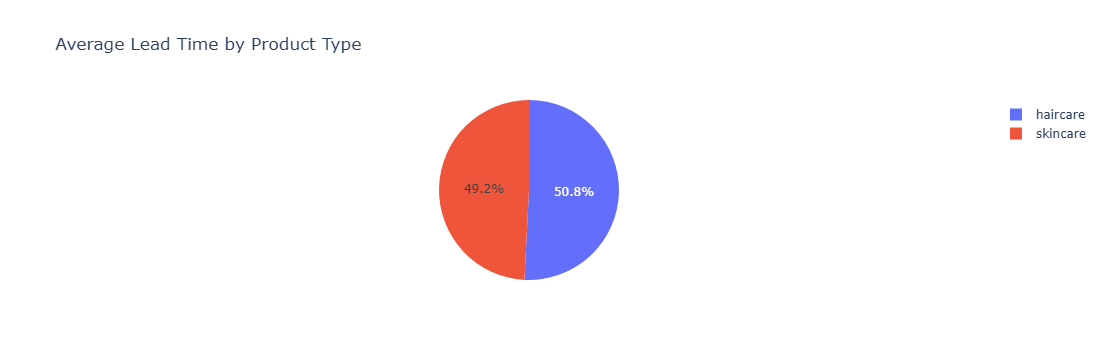

In [116]:
lead_time_group = df.groupby("Product type")["Lead times"].mean().reset_index()
lead_time = px.pie(lead_time_group, names="Product type", values="Lead times", title="Average Lead Time by Product Type")
lead_time.show()